# Introduction

We use the well known Iris data set to explore K-Means clustering further and use the heuristic "elbow" method to pick a "good" number of clusters. The Iris data set is found in the UCI Repository [1] but is also part of the Python test data.  Here we use SciPy and NumPy to do our computations so this data is already available in the SciPy distribution.  

We plot the elbow
plot and the K-Means cluster assignment for the final clustering.


---
## Methods

As per a discussion on StackOverflow [1] we use NumPy and SciPy to do k-means clustering on the well-known UN countries data set using number of clusters K = 1 to 10.  

Although we suspect that there are probably fewer than 10 natural clusters, this allows us to plot a measure called "within cluster sum-of-squares" vs. number of clusters.  

This measure tracks how "tight" a cluster is.  It operates on each cluster and adds up the squares of the distance of each point in a cluster from the centroid of the cluster.  That is, for each point in a cluster we take the distance between that point and the centroid of the cluster and square it.  We do this for each point in the cluster and then we sum it for that cluster.  Then we do this for each cluster.  

When we have a "good" or tight cluster, individual distances will be small and hence the sum of squares for that cluster be small.  For a "bad" or loose cluster the opposite is true.

Now further, when we increase the value of K, the value of "within-cluster-sum-of-squares" will drop as we have more clusters hence smaller distances to centroids.  But each successive increase in K will not give the same drop.  At some point the improvement will start to level off.  We call that value of K the elbow and use that as the "good" value of K.

We do this now for the UN countries data set.  

---
## Results

We now use our modeling software to import data, generate the elbow curve, decide on a k, and then run the clustering over our data.
We then plot the clusters to visualize how the software has allocated cluster numbers to data points and interpret the results.

In [1]:
import os
path = os.getcwd()

In [5]:
%pylab inline
# We run the following SciPy and NumPy code in [1] 
# and generate the plots mentioned above using Matplotlib 

# load the UN dataset transformed to float with 4 numeric columns, 
# lifeMale,lifeFemale,infantMortality and GDPperCapita
import pandas as pd
from pandas import Series, DataFrame
X = pd.read_csv('UN4col.csv')

Populating the interactive namespace from numpy and matplotlib


In [6]:
X.isnull().mean()

lifeMale           0.0
lifeFemale         0.0
infantMortality    0.0
GDPperCapita       0.0
dtype: float64

In [7]:
print X.head()
X = X.values

   lifeMale  lifeFemale  infantMortality  GDPperCapita
0      45.0        46.0            154.0        2850.0
1      68.0        74.0             32.0         863.0
2      67.5        70.3             44.0        1530.0
3      44.9        48.1            124.0         355.0
4      69.6        76.8             22.0        8060.0


In [ ]:
import numpy as np
from scipy.cluster.vq import kmeans, vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

##### cluster data into K=1..10 clusters #####
#K, KM, centroids,D_k,cIdx,dist,avgWithinSS = kmeans.run_kmeans(X,10)

K = range(1,10)

# scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K] # apply kmeans 1 to 10
centroids = [cent for (cent,var) in KM]   # cluster centroids

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]

cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]  


In [ ]:
kIdx = 2
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering')  


So we see that a good K to use in our model would be 3.
We now use the KMeans modeling software to fit clusters to our data and then plot how the software has clustered our data.
In this case we look at how the data cluster when we plot Infant Mortality against GDP.

In [8]:
from sklearn.cluster import KMeans
km = KMeans(3, init='k-means++') # initialize
km.fit(X)
c = km.predict(X) # classify into three clusters

In [12]:
from sklearn.decomposition import PCA
X_2d = PCA(n_components=2, whiten=True).fit_transform(X)

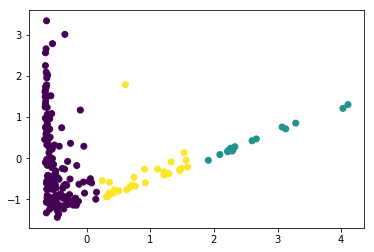

In [13]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=km.labels_)

In [23]:
df = pd.read_csv('UN.csv', usecols=['country','lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita'])

In [25]:
df.dropna(inplace=True"")

SyntaxError: invalid syntax (<ipython-input-25-90889d6cf29f>, line 1)

In [16]:
df['labels'] = km.labels_

In [17]:
df.groupby('labels').mean()

,lifeMale,lifeFemale,infantMortality,GDPperCapita
labels,,,,
0,60.460839,64.919580,55.013986,1624.629371
1,74.681250,80.681250,5.687500,29675.000000
2,72.486207,78.196552,12.827586,13799.310345


(188, 5)

Here we see some patterns, obvious in retrospect.  The countries with GDP (in US Dollars) below 10K have rapidly rising infant mortality as GDP drops. On the other hand as GDP rises we see rapidly decreasing infant mortality, which is as we know, a correlate of financial prosperity, i.e. high GDP.

We also see 3 clusters which we can informally call, the underdeveloped, the developing and the developed countries, based on, respectively, GDP (in US Dollars) below 10K, between 10K and 20K and finally greater than 20K.


What would happen if we tried other dimensions to cluster on, say lifeMale and GDPperCapita.
Let's see.

In [ ]:
(pl0,pl1,pl2) = mykm.plot_clusters(X,c,3,0,False)

And similarly with lifeFemale vs GDPperCapita.


In [ ]:
(pl0,pl1,pl2) = mykm.plot_clusters(X,c,3,1,False)

In both the last two cases we see an opposite trend to infant mortality, where life expectancy rises rapidly as GDP grows, but drop precipitously even to below 40 yrs for countries with the lowest GDP.